# Star Wars Survey

## Exploring the Data

In [101]:
import pandas as pd
import numpy as np 

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [102]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping Yes/No Columns

In [103]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [104]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [105]:
bool_mapping = {
    "Yes": True,
    "No": False
}

str_to_bool_cols = ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for col in str_to_bool_cols:
    star_wars[col] = star_wars[col].map(bool_mapping)
    print(star_wars[col].value_counts(dropna=False))


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning and Mapping Checkbox Columns

In [106]:
episodes = []
for col in star_wars.columns[3:9]:
    episodes.append(star_wars[col].unique()[0])
    
print(episodes)

['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']


In [107]:
name_mapping = {}

for e in episodes:
    name_mapping[e] = True
    
name_mapping[np.NaN] = False

print(name_mapping)

{'Star Wars: Episode I  The Phantom Menace': True, 'Star Wars: Episode II  Attack of the Clones': True, 'Star Wars: Episode III  Revenge of the Sith': True, 'Star Wars: Episode IV  A New Hope': True, 'Star Wars: Episode V The Empire Strikes Back': True, 'Star Wars: Episode VI Return of the Jedi': True, nan: False}


In [108]:
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(name_mapping)
    print(star_wars[col].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [112]:
cols = star_wars.columns[3:9]
col_mapping = {}

for index, col in enumerate(cols, start=1):
    col_mapping[col] = "seen_{}".format(index)
    
print(col_mapping)

star_wars = star_wars.rename(columns=col_mapping)

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4', 'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'}


## Cleaning the Ranking Columns

In [110]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [113]:
rank_cols = star_wars.columns[9:15]
rank_col_mapping = {}

for index, col in enumerate(rank_cols, start=1):
    rank_col_mapping[col] = "ranking_{}".format(index)
    
print(rank_col_mapping)

star_wars = star_wars.rename(columns=rank_col_mapping)

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1', 'Unnamed: 10': 'ranking_2', 'Unnamed: 11': 'ranking_3', 'Unnamed: 12': 'ranking_4', 'Unnamed: 13': 'ranking_5', 'Unnamed: 14': 'ranking_6'}


In [115]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

## Finding the Highest-Ranked Movie

In [120]:
avg_ranking = star_wars[star_wars.columns[9:15]].mean()
print(avg_ranking)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


<AxesSubplot:>

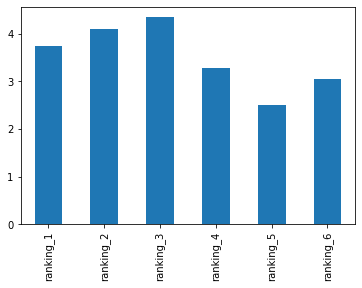

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

avg_ranking.plot.bar()

Based on the chart above, we can see that the highest rank is 2.51 and it belongs to episode V Star Wars: The Empire Strikes Back. Next in order are episode VI, IV, I, II, III as least favourite.
It seems that viewers like the old trilogy more than the new one.

In [127]:
tot_seen = star_wars[star_wars.columns[3:9]].sum()

print(tot_seen)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


Text(0.5, 1.0, 'Views per Episode')

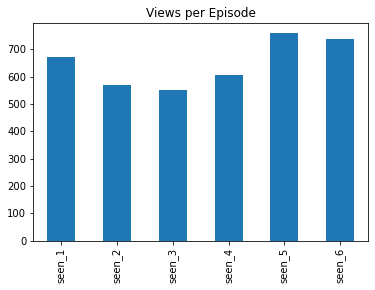

In [131]:
tot_seen.plot.bar()
plt.title("Views per Episode")

There is correlation between views of specific episode and its ranking - the more views, the highest viewers' grade.

## Exploring the Data by Binary Segments

In [132]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [133]:
males_avg_ranking = males[males.columns[9:15]].mean()
print(males_avg_ranking)

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64


In [134]:
females_avg_ranking = females[females.columns[9:15]].mean()
print(females_avg_ranking)

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


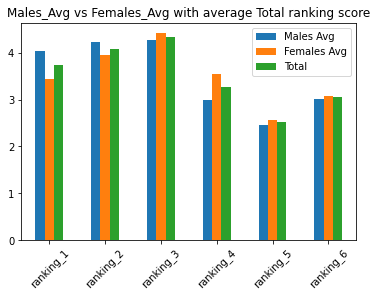

In [135]:
males_vs_females_ranking = (pd.concat([males_avg_ranking, females_avg_ranking, avg_ranking], axis=1).
                        rename({0 : 'Males Avg', 1: 'Females Avg', 2 :'Total'}, axis=1))

males_vs_females_ranking.plot.bar(rot=45)
plt.title('Males_Avg vs Females_Avg with average Total ranking score')
plt.show()